## ESA CCI Toolbox Data Access

The aim of this notebook is to show how to query for all the data sets provided by the ESA CCI Toolbox.
To run this Notebook, make sure the ESA CCI Toolbox is setup correctly.

The ESA CCI Toolbox is based on xcube. It provides dedicated stores to access data from the ESA Open Data Portal (ODP). To access the store, we can use the following import.

In [1]:
from xcube.core.store import new_data_store

Now we can acces the ESA Open Data Portal store. We may request it by 'esa-cci'.

In [2]:
cci_store = new_data_store('esa-cci')

We can check what types of data it provides.

In [3]:
cci_store.get_data_types()

('dataset', 'geodataframe', 'vectordatacube', 'datatree')

All provided data are datasets. So, let's have a look what data sets are available. 

In [4]:
datasets = cci_store.get_data_ids()
list(datasets)

['esacci.GHG.satellite-orbit-frequency.L2.CH4.TROPOMI.Sentinel-5P.WFMD.v1-8.201711-202406',
 'esacci.AEROSOL.5-days.L3C.AEX.GOMOS.Envisat.AERGOM.3-00.r1',
 'esacci.AEROSOL.climatology.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1',
 'esacci.AEROSOL.day.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.ADV.2-31.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.ORAC.04-01-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.ORAC.04-01_seg-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.SU.4-3.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ADV.2-31.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ORAC.04-01-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ORAC.04-01_seg-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.SU.4-3.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.multi-sensor.multi-platform.AATSR-ENVISAT-ENS_DAILY.v2-6.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.multi-sensor.mult

This might have been a bit much. In case you are looking for particular data sets, you can search for them. You can list which search options are available:

In [5]:
cci_store.get_search_params_schema()

The parameters are listed under *properties*. *start_date*, *end_date* and *bbox* are standard search parameters that are also used by other stores. *cci_attrs* lists additional parameters that are specific for the cci store (again, listed under *properties*). Of these, let's use *ecv* and *frequency*.

In [6]:
cci_attrs = dict(
    ecv='AEROSOL', 
    frequency='month'
)

[descriptor.data_id for descriptor in cci_store.search_data(cci_attrs=cci_attrs)]

['esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.AATSR.Envisat.ADV.2-31.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.AATSR.Envisat.ORAC.04-01-.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.AATSR.Envisat.ORAC.04-01_seg-.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.AATSR.Envisat.SU.4-3.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ADV.2-31.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ORAC.04-01-.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ORAC.04-01_seg-.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.ATSR-2.ERS-2.SU.4-3.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.multi-sensor.multi-platform.AATSR-ENVISAT-ENS_MONTHLY.v2-6.r1',
 'esacci.AEROSOL.mon.L3C.AER_PRODUCTS.multi-sensor.multi-platform.ATSR2-ENVISAT-ENS_MONTHLY.v2-6.r1',
 'esacci.AEROSOL.mon.L3C.AOD.MERIS.Envisat.MERIS_ENVISAT.2-2.r1']

'esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1' sounds interesting. Let's get more information about that one.

In [7]:
cci_store.describe_data('esacci.FIRE.mon.L4.BA.MODIS.Terra.MODIS_TERRA.v5-1.grid')

Finally, we can have a look at which openers are provided by this store.

In [8]:
cci_store.get_data_opener_ids()

['dataset:zarr:cciodp',
 'dataframe:geojson:esa-cdc',
 'vectordatacube::esa-cdc',
 'datatree:zarr:esa-cdc']

Here is how you can view which parameters can be used when you want to open a particular dataset (both parameters are optional).

In [9]:
cci_store.get_open_data_params_schema(data_id='esacci.FIRE.mon.L4.BA.MODIS.Terra.MODIS_TERRA.v5-1.grid', opener_id='dataset:zarr:cciodp')

Great! Now we are all set to open some cubes.

In [10]:
ds = cci_store.open_data(data_id='esacci.FIRE.mon.L4.BA.MODIS.Terra.MODIS_TERRA.v5-1.grid', opener_id='dataset:zarr:cciodp')
ds

<xarray.Dataset> Size: 25GB
Dimensions:                          (time: 264, lat: 720, lon: 1440,
                                      vegetation_class: 18, nv: 2, bnds: 2)
Coordinates:
  * lat                              (lat) float32 3kB 89.88 89.62 ... -89.88
    lat_bnds                         (lat, nv) float32 6kB dask.array<chunksize=(720, 2), meta=np.ndarray>
  * lon                              (lon) float32 6kB -179.9 -179.6 ... 179.9
    lon_bnds                         (lon, nv) float32 12kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * time                             (time) datetime64[ns] 2kB 2001-01-16T12:...
    time_bnds                        (time, bnds) datetime64[ns] 4kB dask.array<chunksize=(264, 2), meta=np.ndarray>
  * vegetation_class                 (vegetation_class) int32 72B 10 20 ... 180
Dimensions without coordinates: nv, bnds
Data variables:
    burned_area                      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 20GB dask.array<chunksize=(1, 6, 720, 720), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    number_of_patches                (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.FIRE.mon.L4.BA.MODIS.Terra.MODIS_TERRA.v5...
    date_created:            2025-12-04T10:47:12.287171
    processing_level:        L4
    time_coverage_start:     2001-01-01T00:00:00
    time_coverage_end:       2023-01-01T00:00:00
    time_coverage_duration:  P8035DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

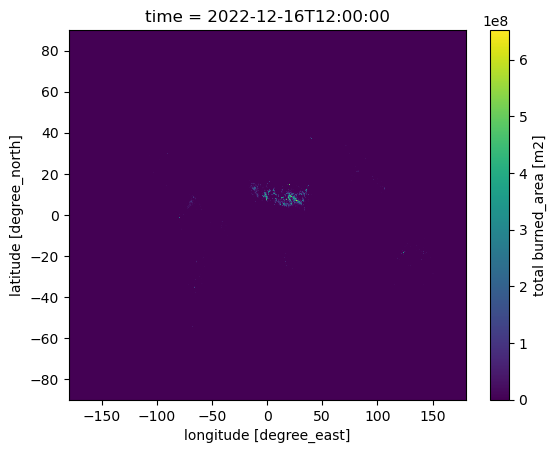

In [11]:
ds.isel(time=263).burned_area.plot()